## RQ2
As part of RQ2, we analyze the reply engagement of users before and after harassment.

In [14]:
import pandas as pd
full_data = pd.read_csv("./full_data.csv", header = None)
full_data.head()

0                    1  \
0  2020-10-30T23:49:17.000Z  1322324726904180736   
1  2020-10-30T23:47:37.000Z  1322324307947696128   
2  2020-10-30T23:47:21.000Z  1322324242722115589   
3  2020-10-30T23:42:11.000Z  1322322943012200450   
4  2020-10-30T23:41:48.000Z  1322322845473607680   

                                                   2                    3  4  
0  @CharlieBewick5 Are you calling me bland and f...  1018986319786184704  0  
1                            @CharlieBewick5 Awww🥰🥰🥰  1018986319786184704  0  
2                               @CharlieBewick5 😽😽😽😽  1018986319786184704  0  
3                                 @CharlieBewick5 🤏🍆  1018986319786184704  0  
4                                 @CharlieBewick5 Oh  1018986319786184704  0

In [15]:
print(full_data[3].nunique())

293


In [16]:
tweet_type = []
for index, row in full_data.iterrows():
    if row[2][0] == '@':
        tweet_type.append('Reply')
        continue
    if row[2][0] == 'R' and row[2][1] == 'T':
        tweet_type.append('Retweet')
    else:
        tweet_type.append("Post")
        
full_data['Tweet Type'] = tweet_type

In [18]:
full_data = full_data.rename(columns={3: 'User ID', 4: 'is_after_harassment'})
print(full_data['User ID'].nunique())
full_data = full_data.loc[full_data['Tweet Type'] == 'Reply']
print(full_data['User ID'].nunique())
full_data.head()

293
281


0                    1  \
0  2020-10-30T23:49:17.000Z  1322324726904180736   
1  2020-10-30T23:47:37.000Z  1322324307947696128   
2  2020-10-30T23:47:21.000Z  1322324242722115589   
3  2020-10-30T23:42:11.000Z  1322322943012200450   
4  2020-10-30T23:41:48.000Z  1322322845473607680   

                                                   2              User ID  \
0  @CharlieBewick5 Are you calling me bland and f...  1018986319786184704   
1                            @CharlieBewick5 Awww🥰🥰🥰  1018986319786184704   
2                               @CharlieBewick5 😽😽😽😽  1018986319786184704   
3                                 @CharlieBewick5 🤏🍆  1018986319786184704   
4                                 @CharlieBewick5 Oh  1018986319786184704   

   is_after_harassment Tweet Type  
0                    0      Reply  
1                    0      Reply  
2                    0      Reply  
3                    0      Reply  
4                    0      Reply

In [19]:
counts = full_data.groupby(['User ID', 'is_after_harassment']).size().reset_index(name="Total Count")
counts.head()

User ID  is_after_harassment  Total Count
0  15239674                    0           46
1  15239674                    1           63
2  15634495                    0           75
3  15634495                    1           62
4  17521339                    0            6

In [24]:
before = counts[counts['is_after_harassment'] == 0]
after = counts[counts['is_after_harassment'] == 1]
result = pd.merge(before, after, how="left", on=['User ID'])
#result.head()
print(result.shape[0])
print(result['User ID'].nunique())
values = {"is_after_harassment_y": 1.0, "Total Count_y": 0.0}
result = result.fillna(value=values)


260
260


Text(0, 0.5, 'After Harassment')

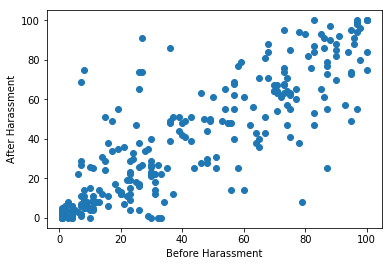

In [25]:
import matplotlib.pyplot as plt 

plt.scatter(x=result['Total Count_x'], y=result['Total Count_y'])
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")

In [26]:
print(result)

                 User ID  is_after_harassment_x  Total Count_x  \
0               15239674                      0             46   
1               15634495                      0             75   
2               17521339                      0              6   
3               18361789                      0             75   
4               18836491                      0             78   
..                   ...                    ...            ...   
255  1396506859884929028                      0             10   
256  1398116131223719944                      0             64   
257  1408302708570812417                      0             23   
258  1421213441520504833                      0              4   
259  1426261147318198281                      0             36   

     is_after_harassment_y  Total Count_y  
0                      1.0           63.0  
1                      1.0           62.0  
2                      1.0            3.0  
3                      1.0     

(array([0.00269231, 0.00526756, 0.00901338, 0.00784281, 0.00187291,
        0.00058528, 0.00046823, 0.00070234, 0.00058528, 0.00035117,
        0.00023411, 0.00023411, 0.00023411, 0.        , 0.        ,
        0.00011706, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00011706, 0.00011706]),
 array([-100.        ,  -67.14285714,  -34.28571429,   -1.42857143,
          31.42857143,   64.28571429,   97.14285714,  130.        ,
         162.85714286,  195.71428571,  228.57142857,  261.42857143,
         294.28571429,  327.14285714,  360.        ,  392.85714286,
         425.71428571,  458.57142857,  491.42857143,  524.28571429,
         557.14285714,  590.        ,  622.85714286,  655.71428571,
         688.57142857,  721.42857143,  754.28571429,  787.14285714,
         820.        ,  852.85714286,  885.71428571]),
 <a list of 30 Patch objects>)

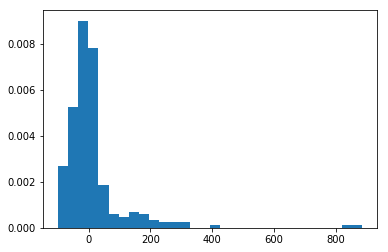

In [27]:
# Get differences for the Tweet Posts 
result['Differences %'] = ((result['Total Count_y'] - result['Total Count_x'])/result['Total Count_x'])*100
plt.hist(result['Differences %'], density=True, bins=30)